In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Dataset/seattle-weather.csv')

In [3]:
df.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In [4]:
df.isnull().sum()

date             0
precipitation    0
temp_max         0
temp_min         0
wind             0
weather          0
dtype: int64

In [5]:
df.duplicated().sum()

0

In [26]:
#coulmn Open converted into numpy array
training_set = df.iloc[:,2:3].values
training_set

array([[12.8],
       [10.6],
       [11.7],
       ...,
       [ 7.2],
       [ 5.6],
       [ 5.6]])

In [27]:
len(training_set)

1461

In [8]:
def df_to_XY(df,window_size=10):
 X_train=[]
 y_train=[]

 for i in range(10,len(training_set)):
    X_train.append(training_set[i-10:i,0])
    y_train.append(training_set[i,0])
    
 X_train, y_train = np.array(X_train), np.array(y_train)
 return X_train, y_train

In [30]:
WINDOW = 10
X,y = df_to_XY(df,WINDOW)
print(X.shape)
print(y.shape)
# print(len(X),len(y))
# X_train = X[:800]
# y_train = y[:800]
# X_val = X[800:1000]
# y_val = y[800:1000]
# X_test = X[1000:]
# x_test = y[1000:]

(1451, 10)
(1451,)


In [10]:
#Reshaping(To add new dimensions)
X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))
X_val = np.reshape(X_val,(X_val.shape[0],X_val.shape[1],1))
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))


In [11]:
#Building the RNN
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

In [12]:
regressor = Sequential()

In [13]:
#Addinf the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units=50, return_sequences = True, input_shape=(X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))

#Output layer
regressor.add(Dense(units=1))

C:\Users\adity\OneDrive - IIT Delhi\Anaconda installation\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [22]:
regressor.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 10, 50)              │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 10, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 10, 50)              │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 10, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 10, 50)              │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 10, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 213,155 (832.64 KB)

 Trainable params: 71,051 (277.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 142,104 (555.10 KB)

In [14]:
#Compiling
regressor.compile(optimizer='adam',loss='mean_squared_error')

In [15]:
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam


In [16]:
#fitting the rnn to the training set
history=regressor.fit(X_train,y_train,validation_data=(X_val,y_val),epochs=100, batch_size=32)

Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 7s 44ms/step - loss: 237.5312 - val_loss: 250.8237
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 110.5801 - val_loss: 172.2885
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 80.1032 - val_loss: 143.3454
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 66.4547 - val_loss: 123.1676
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 65.1774 - val_loss: 108.5847
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 60.6453 - val_loss: 98.0935
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 54.8102 - val_loss: 91.1893
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 55.2565 - val_loss: 85.4980
Epoch 9/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 52.2630 - val_loss: 81.5844
Epoch 10/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 52.9360 - val_loss: 79.5787
Epoch 11/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 57.4102 - val_loss: 77.4036
Epoch 12/100
25/25 ━━━━

25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 9.7401 - val_loss: 11.5383
Epoch 68/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 9.1254 - val_loss: 10.7773
Epoch 69/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 8.7541 - val_loss: 11.5402
Epoch 70/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 9.3675 - val_loss: 10.6127
Epoch 71/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 8.7474 - val_loss: 10.4245
Epoch 72/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 7.9826 - val_loss: 10.6783
Epoch 73/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 9.4477 - val_loss: 10.2579
Epoch 74/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 8.5936 - val_loss: 10.6892
Epoch 75/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 8.5601 - val_loss: 10.4022
Epoch 76/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 8.0677 - val_loss: 10.2231
Epoch 77/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 8.5934 - val_loss: 10.2780
Epoch 78/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 14

In [17]:
his = pd.DataFrame(history.history)

In [18]:
his.head()

,loss,val_loss
0,203.261841,250.823685
1,97.423363,172.288452
2,74.793480,143.345398
3,65.427063,123.167595
4,60.921669,108.584679


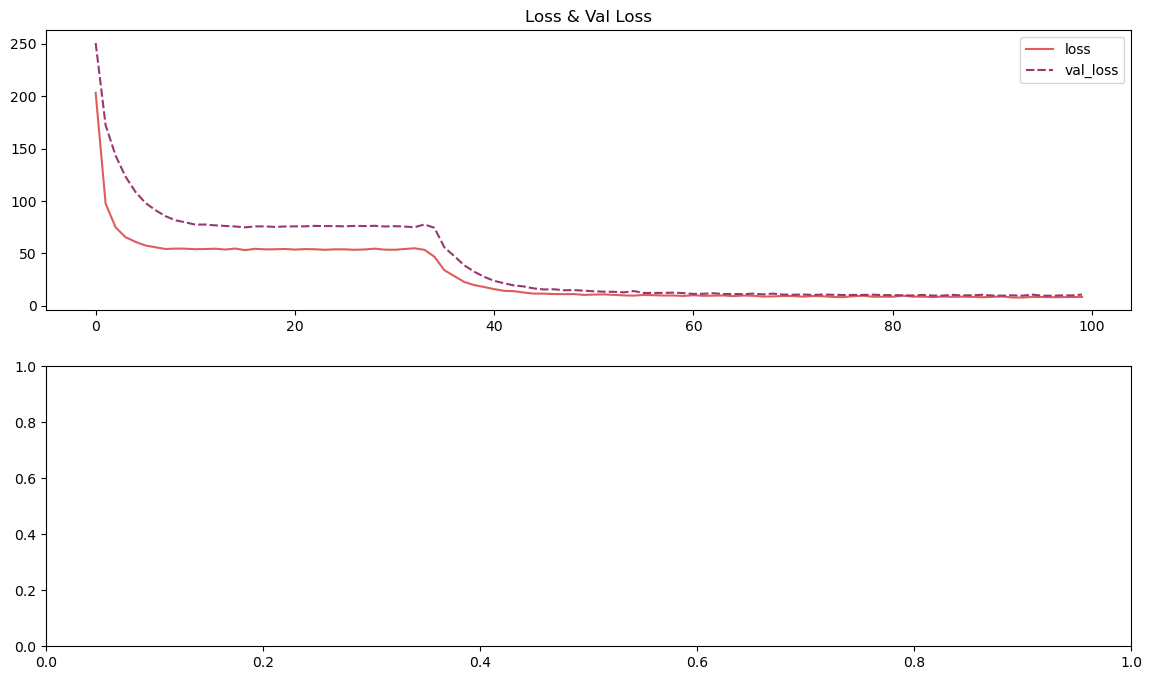

In [19]:
import seaborn as sns
his.columns
history_loss = his[['loss', 'val_loss']]


fig,axes = plt.subplots(2,1,figsize=(14,8))
plt.subplot(2,1,1)
plt.title("Loss & Val Loss")
sns.lineplot(history_loss,palette="flare");



In [20]:
train_pred = regressor.predict(X_train).flatten()
val_pred = regressor.predict(X_val).flatten()
test_pred = regressor.predict(X_test).flatten()

25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 91ms/step
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


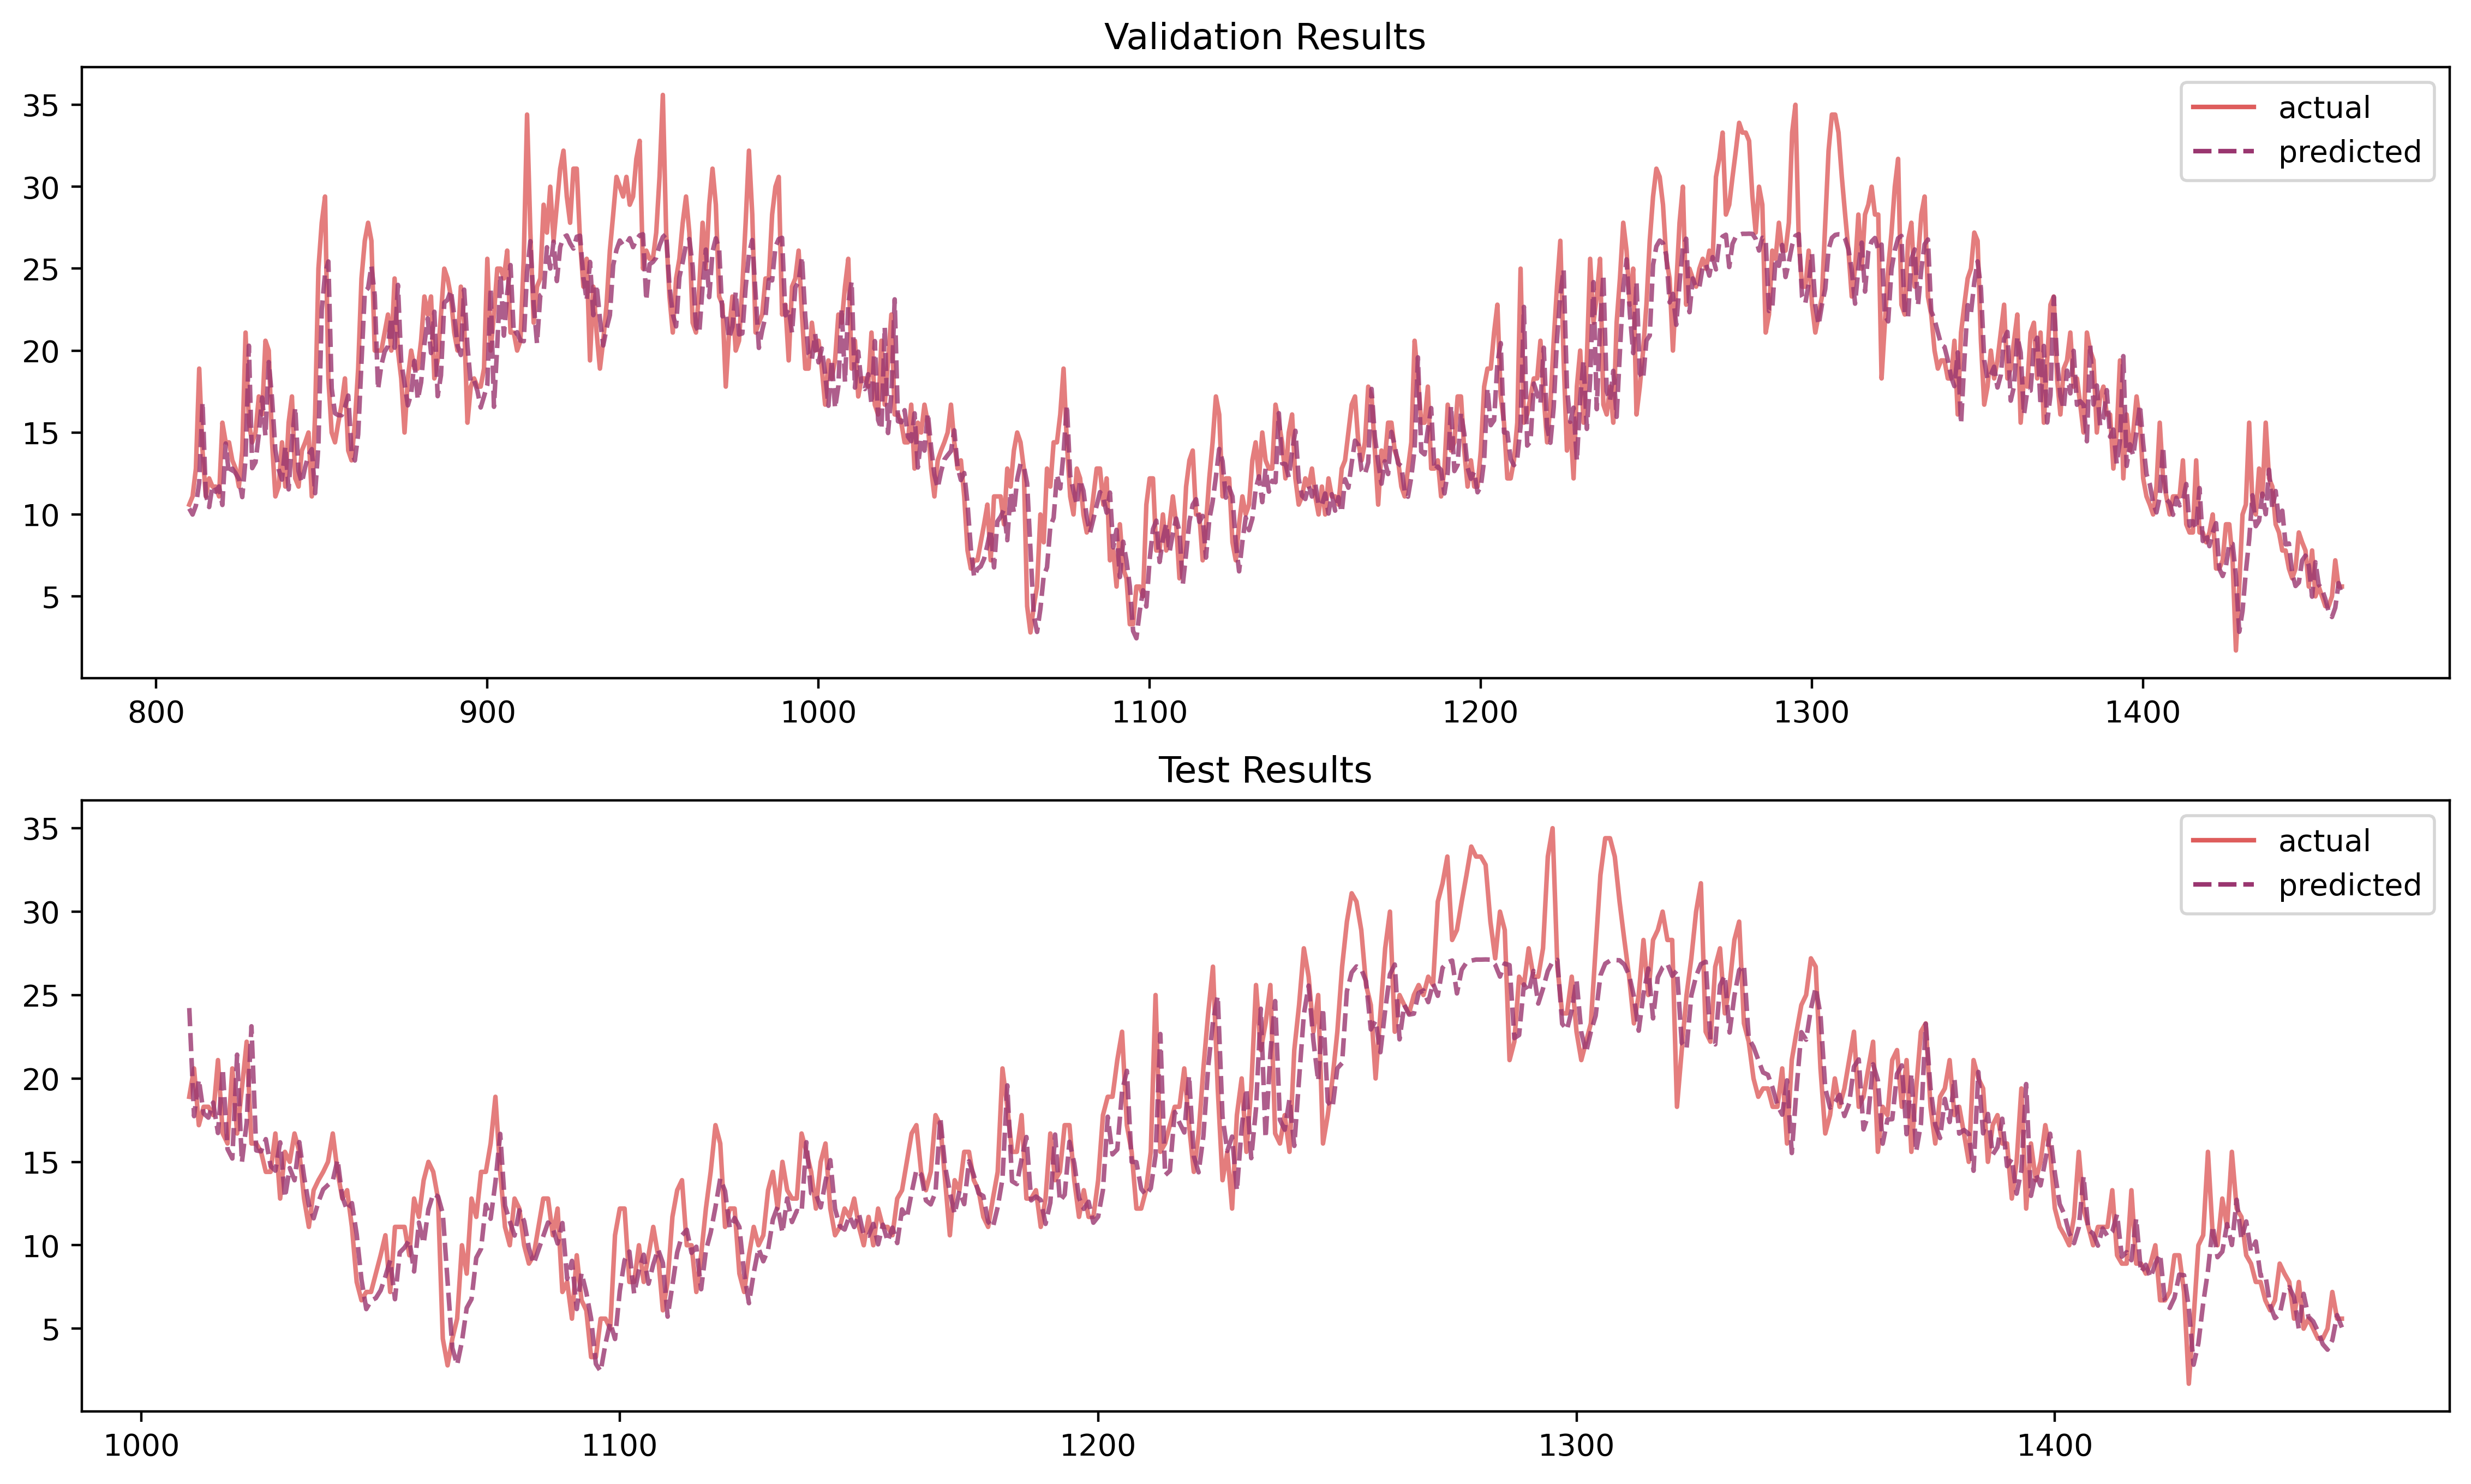

In [21]:
pred = np.concatenate([train_pred,val_pred,test_pred])
df_pred = pd.DataFrame(df["temp_max"].copy())
df_pred.columns=["actual"]
df_pred = df_pred[WINDOW:]
df_pred["predicted"] = pred

fig,axes = plt.subplots(2,1,figsize=(14,8),dpi=400)

plt.subplot(2,1,1)
plt.title("Validation Results")
sns.lineplot(df_pred[800:],alpha=0.8,palette="flare",linestyle=None);

plt.subplot(2,1,2)
plt.title("Test Results")
sns.lineplot(df_pred[1000:],alpha=0.8,palette="flare",linestyle=None);